In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [189]:
header =['SDSS', 'per', 'vtype']
df_stars_1 = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
df_stars_1 = df_stars_1.dropna(subset=['per'])
df_stars_1['per'] = df_stars_1['per']*24*60
df_stars_1.index = df_stars_1.index + 1
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(df_stars_1)
# df_stars_1

In [190]:
header =['SDSS', 'per', 'vtype']
df_stars_1 = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
df_non_polars = df_stars_1
df_non_polars = df_non_polars[df_non_polars['vtype'].str.startswith('Polar')==False]
df_non_polars = df_non_polars[df_non_polars['vtype'].str.startswith('PREP')==False]
df_non_polars = df_non_polars[df_non_polars['vtype'].str.startswith('IP')==False]
df_non_polars['per']=df_non_polars['per']*24*60
df_non_polars = df_non_polars.dropna()
df_non_polars.index = df_non_polars.index + 1

In [191]:
df_polars = df_stars_1
df_polars = df_polars[df_polars['vtype'].str.startswith(('Polar','PREP', 'IP'))]
df_polars['per']=df_polars['per']*24*60
df_polars = df_polars.dropna()
df_polars.index = df_polars.index + 1
df_polars

/tmp/ipykernel_367/2944793890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_polars['per']=df_polars['per']*24*60


,SDSS,per,vtype
9,SDSSJ001856.92+345444.2,855.49392,Polar:
13,SDSSJ002637.05+242915.6,122.87520,Polar
24,SDSSJ004213.04+073137.8,154.08000,IP:
29,SDSSJ004924.50+222617.9,354.98880,Polar
33,SDSSJ005657.57+320621.7,95.25420,Polar
...,...,...,...
474,SDSSJ223843.83+010820.6,194.30208,IP
491,SDSSJ231909.18+331539.6,210.47040,IP
492,SDSSJ231930.43+261518.6,180.63360,Polar
498,SDSSJ233325.92+152222.1,83.08800,IP


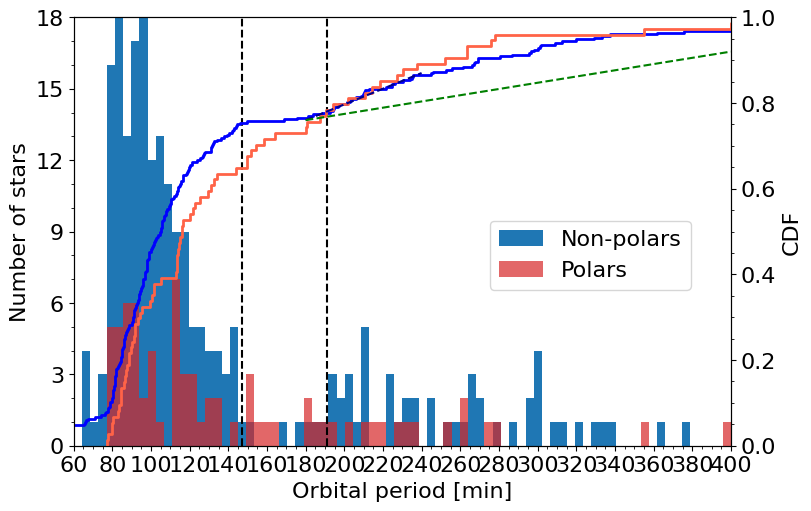

In [192]:
hfont = {'fontname':'Helvetica'}

fig, ax2 = plt.subplots(1, 1, figsize=(8,5),layout='constrained')

ax2.hist(df_non_polars['per'], bins=80, range=(60, 400), density=False, color='tab:blue', alpha = 1, label = 'Non-polars')
ax2.hist(df_polars['per'], bins=80, range=(60, 400), density=False, color='tab:red', alpha = 0.7, label = 'Polars')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.set_xlim([60,400])
ax2.set_ylim([0,18])
ax2.set_xlabel('Orbital period [min]')
ax2.set_ylabel('Number of stars')
ax2.vlines([147, 191], 0, 18, color='black', linestyle='--')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.rc('font', size=16)

# ax2.plot([80, 146], [19, 3.5], linestyle='--',  linewidth = 4, color = 'tomato')
# ax2.axhline(y = 3.5, xmin=(192-80)/(400-80), linestyle='--', linewidth = 4, color = 'grey')
# plt.text( 110, 9, 'RISING', rotation=-50, color='tomato')
# plt.text( 200, 4, 'CONSTANT', rotation=0, color='grey')

ax1 = ax2.twinx()

ax1.ecdf(df_non_polars['per'], color = 'blue', linewidth=2)
ax1.ecdf(df_polars['per'], color = 'tomato', linewidth=2)

ax1.set_ylabel('CDF')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(.05))
ax1.plot([180,240],[0.76, 0.87], linestyle='--', color='darkblue')
ax1.plot([180,400],[0.76, 0.92], linestyle='--', color='green')

fig.legend(loc='center right', bbox_to_anchor=(0.87, 0.5))
# fig.tight_layout()

(80.0, 260.0)

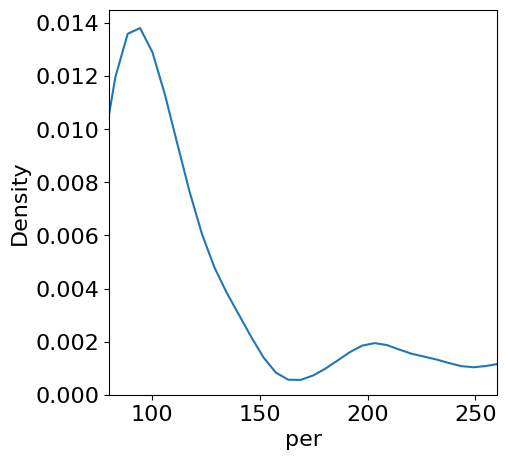

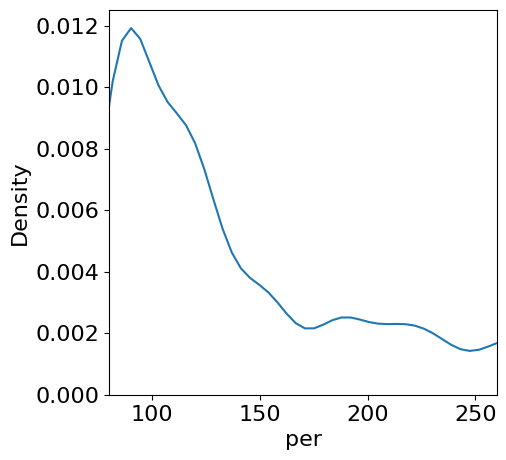

In [193]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
sns.kdeplot(data=df_non_polars['per'], ax=ax1, bw_adjust=.25)
ax1.set_xlim((80,260))

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
sns.kdeplot(data=df_polars['per'], ax=ax1, bw_adjust=.25)
ax1.set_xlim((80,260))


binning testing

array([-964.28302489, -911.24719798, -880.38097322, -870.8542504 ,
       -870.26269914, -867.46041478, -866.83103788, -866.2815361 ,
       -864.7025962 , -869.6439034 , -866.24216867, -864.0157832 ,
       -868.48494633, -870.72378894, -870.13747081, -867.20151398,
       -867.3115443 , -868.87727425, -870.11636218, -869.38893825,
       -872.99617065, -870.57219305, -872.16399708, -864.81181707,
       -869.99198301, -870.43315785, -873.87945267, -876.09016235,
       -875.25583036, -873.04624012, -875.34225875, -873.60576086,
       -875.60064032, -875.34017006, -880.43592406, -875.28306412,
       -878.15868454, -876.56493196, -876.55450836, -878.14841613,
       -876.96920554, -876.04014656, -875.67587116, -879.31816814,
       -877.41552889, -879.39036014, -878.74595368, -876.67482317,
       -877.40065618, -875.15325948, -880.84647989, -878.28921776,
       -882.83046339, -881.93775722, -886.85603753, -886.816597  ,
       -880.75997969, -885.35385724, -885.00959288, -877.58830

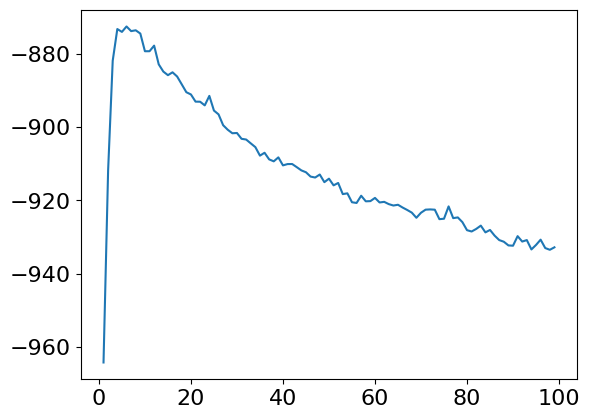

In [194]:
x_rang = df_non_polars[df_non_polars['per'].between(80,240)]
x_rang = x_rang['per']
# V = max(x_rang) - min(x_rang)
V = 240 - 80 #granice przedziału, który nas interesuje
def which_bin(m):
    x_min = 80
    x_max = 240
    DEL = (x_max - x_min)/m
    result = np.floor((x_rang.apply(lambda x: x - x_min)) / DEL - 0)
    return result.values

def n_i(m,i):  
    x_to_bin = which_bin(m)
    return  (x_to_bin == i).sum()

def L(m, alfa):
    sum = 0
    values = np.zeros_like(m, dtype=float)
    for num in m:
        for i in range(num):
            sum += (n_i(num,i) * np.log((n_i(num,i) + alfa - 1) / (V / num * (len(x_rang) +  num*alfa - 1))))
        values[num - 1] = sum
        sum = 0
    return values

ms = np.arange(1, 100, 1)

valL = (L(ms, 10))
plt.plot(ms, valL)
L(ms, 1.1)

Optimising binning split

In [195]:
def logL(split, data, alfa, boundaries):
    """
    Calculates the log-likelihood score for a given split point in a dataset.

    Parameters:
    - split: Numeric value representing the split point for the dataset.
    - data: Array-like object containing the dataset.
    - alfa: Numeric value representing a smoothing parameter used to avoid zero probabilities.
    - boundaries: Array-like object containing the boundary values for the dataset.

    Returns:
    - result: Float representing the calculated log-likelihood score.
    """

    # Count number of data points less than split
    N0 = (data < split).sum()

    # Count number of data points greater than split
    N1 = (data > split).sum()

    # Total number of data points
    N = N1 + N0 

    # Compute the distance from the split point to the boundaries
    delta0 = split - boundaries[0]
    delta1 = boundaries[1] - split

    # Calculate the log-likelihood score for the left and right partitions
    summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))
    summand1 = N1 * np.log((N1 + alfa - 1) / (delta1 * (N + 2 * alfa - 1)))

    # Compute the total log-likelihood score
    result = summand0 + summand1

    return float(result)


def logL_values(splits, data, alfa, boundaries):
    """
    Computes log-likelihood scores for multiple split points in a dataset.

    Parameters:
    - splits: Array-like object containing multiple split points to evaluate.
    - data: Array-like object containing the dataset.
    - alfa: Numeric value representing a smoothing parameter used to avoid zero probabilities.
    - boundaries: Array-like object containing the boundary values for the dataset.

    Returns:
    - result_values: Array containing the log-likelihood scores corresponding to each split point.
    """

    # Initialize an array to store the log-likelihood scores for each split point
    result_values = np.zeros(len(splits))

    # Iterate over each split point
    for i, split in enumerate(splits):
        # Calculate the log-likelihood score for the current split point
        result_values[i] = logL(split, data, alfa, boundaries)

    return result_values

per_max=240

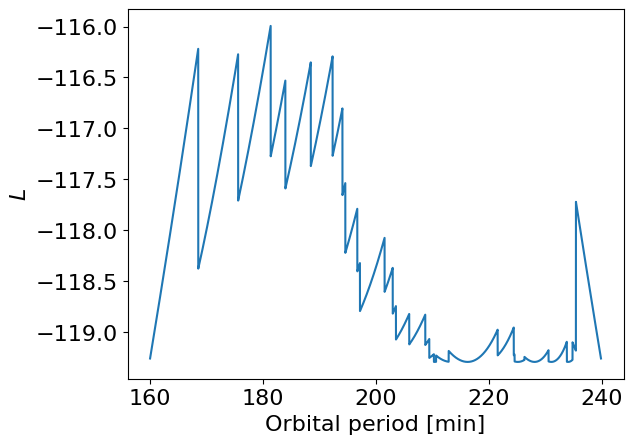

In [196]:
per_min = 160
per_max = 240
x_rang = df_non_polars['per']
x_rang = x_rang[x_rang.between(per_min, per_max)]
period_split = np.arange(per_min + .1, per_max -.1, .01)
period_boundaries = np.array([per_min, per_max])
# logL_values (splits=period_split, data=x_rang, alfa=2, boundaries=period_boundaries)
plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=1.00001, boundaries=period_boundaries))
# plt.scatter(181.43999999998059, -115.99314449137808, color = 'red')
# plt.axvline(181.43999999998059, color = 'red', linestyle='--')
# plt.axhline(-115.99314449137808, color = 'red', linestyle='--')
plt.xlabel('Orbital period [min]')
plt.ylabel('$L$')
# plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=10, boundaries=period_boundaries))
# plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=0.1, boundaries=period_boundaries))
# plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=0.01, boundaries=period_boundaries))
plt.rc('font', size=14)


per_max=300

/tmp/ipykernel_367/3665639053.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))
/tmp/ipykernel_367/3665639053.py:29: RuntimeWarning: invalid value encountered in scalar multiply
  summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))


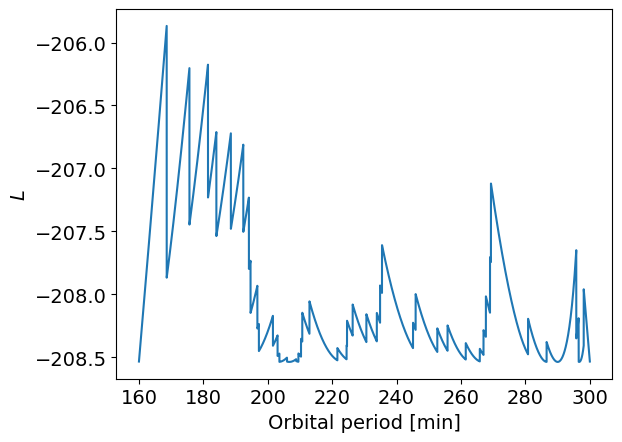

In [197]:
per_min = 160
per_max = 300
x_rang = df_non_polars['per']
x_rang = x_rang[x_rang.between(per_min, per_max)]
period_split = np.arange(per_min, per_max, .01)
period_boundaries = np.array([per_min, per_max])
# logL_values (splits=period_split, data=x_rang, alfa=2, boundaries=period_boundaries)
plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=1.00001, boundaries=period_boundaries))
# plt.scatter(181.43999999998059, -115.99314449137808, color = 'red')
# plt.axvline(181.43999999998059, color = 'red', linestyle='--')
# plt.axhline(-115.99314449137808, color = 'red', linestyle='--')
plt.xlabel('Orbital period [min]')
plt.ylabel('$L$')
# plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=10, boundaries=period_boundaries))
# plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=0.1, boundaries=period_boundaries))
# plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=0.01, boundaries=period_boundaries))
plt.rc('font', size=14)

histogram for periods: 80-300 minutes

(array([20., 19.,  9., 15., 18., 11.,  9., 10.,  9., 11.,  6.,  3.,  4.,
         4.,  4.,  2.,  3.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  1.,  1.,  1.,  4.,  0.,  3.,  1.,  4.,  1.,  0.,  1.,
         3.,  0.,  2.,  2.,  0.,  0.,  2.,  0.,  2.,  0.,  1.,  2.,  3.,
         0.,  0.,  1.,  0.,  1.,  0.,  1.,  2.]),
 array([ 80.        ,  83.66666667,  87.33333333,  91.        ,
         94.66666667,  98.33333333, 102.        , 105.66666667,
        109.33333333, 113.        , 116.66666667, 120.33333333,
        124.        , 127.66666667, 131.33333333, 135.        ,
        138.66666667, 142.33333333, 146.        , 149.66666667,
        153.33333333, 157.        , 160.66666667, 164.33333333,
        168.        , 171.66666667, 175.33333333, 179.        ,
        182.66666667, 186.33333333, 190.        , 193.66666667,
        197.33333333, 201.        , 204.66666667, 208.33333333,
        212.        , 215.66666667, 219.33333333, 223.        ,
        226.666666

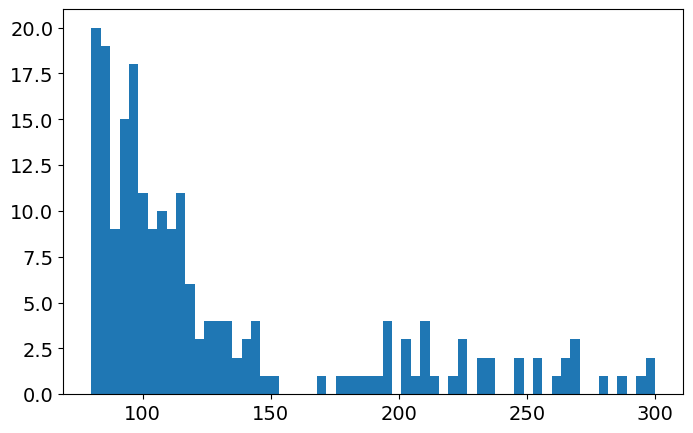

In [198]:
fig, ax2 = plt.subplots(1, 1, figsize=(8,5))
ax2.hist(df_non_polars['per'], range=(80, 300), bins=60)

Graph for presentation

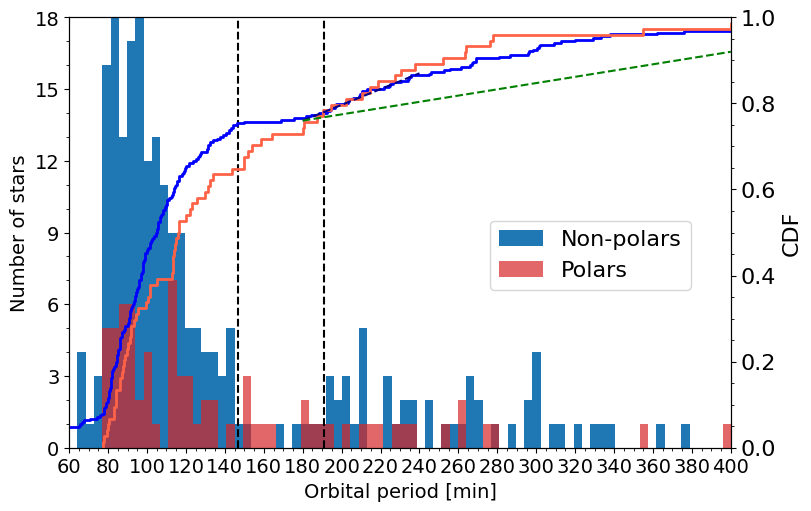

In [199]:
hfont = {'fontname':'Helvetica'}

fig, ax2 = plt.subplots(1, 1, figsize=(8,5),layout='constrained')

ax2.hist(df_non_polars['per'], bins=80, range=(60, 400), density=False, color='tab:blue', alpha = 1, label = 'Non-polars')
ax2.hist(df_polars['per'], bins=80, range=(60, 400), density=False, color='tab:red', alpha = 0.7, label = 'Polars')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.set_xlim([60,400])
ax2.set_ylim([0,18])
ax2.set_xlabel('Orbital period [min]')
ax2.set_ylabel('Number of stars')
ax2.vlines([147, 191], 0, 18, color='black', linestyle='--')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.rc('font', size=16)

# ax2.plot([80, 146], [19, 3.5], linestyle='--',  linewidth = 4, color = 'tomato')
# ax2.axhline(y = 3.5, xmin=(192-80)/(400-80), linestyle='--', linewidth = 4, color = 'grey')
# plt.text( 110, 9, 'RISING', rotation=-50, color='tomato')
# plt.text( 200, 4, 'CONSTANT', rotation=0, color='grey')

ax1 = ax2.twinx()

ax1.ecdf(df_non_polars['per'], color = 'blue', linewidth=2)
ax1.ecdf(df_polars['per'], color = 'tomato', linewidth=2)

ax1.set_ylabel('CDF')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(.05))
ax1.plot([180,240],[0.76, 0.87], linestyle='--', color='darkblue')
ax1.plot([180,400],[0.76, 0.92], linestyle='--', color='green')

fig.legend(loc='center right', bbox_to_anchor=(0.87, 0.5))
# fig.tight_layout()

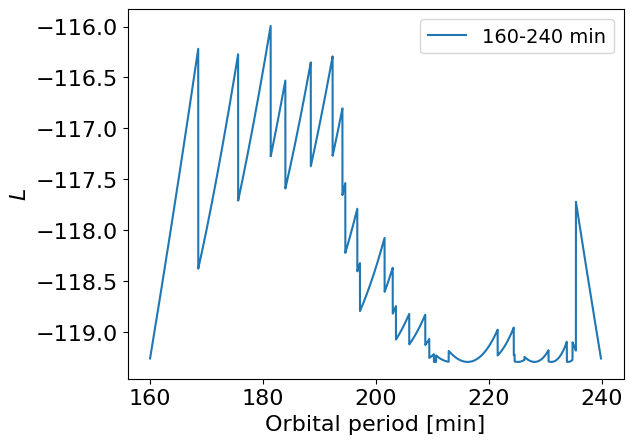

In [200]:
per_min = 160
per_max = 240
x_rang = df_non_polars['per']
x_rang = x_rang[x_rang.between(per_min, per_max)]
period_boundaries = np.array([per_min, per_max])
period_split = np.arange(per_min + .1, per_max -.1, .01)
plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=1.00001, boundaries=period_boundaries), label=f"{per_min}-{per_max} min")
plt.xlabel('Orbital period [min]')
plt.ylabel('$L$')
plt.rc('font', size=14)
plt.legend()


Text(0.02, 0.5, '$L$')

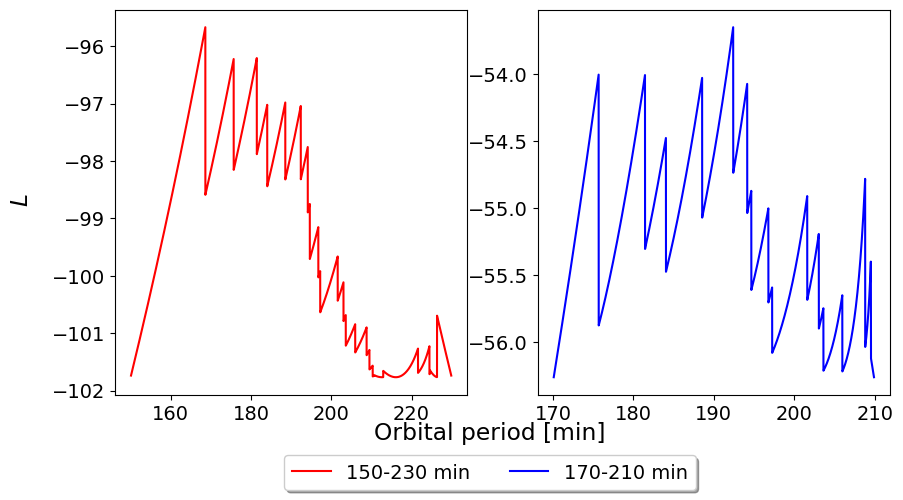

In [201]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

per_min = 150
per_max = 230
x_rang = df_non_polars['per']
x_rang = x_rang[x_rang.between(per_min, per_max)]
period_boundaries = np.array([per_min, per_max])
period_split = np.arange(per_min + .1, per_max -.1, .01)
axes[0].plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=1.00001, boundaries=period_boundaries), label=f"{per_min}-{per_max} min", color='red')

per_min = 170
per_max = 210
x_rang = df_non_polars['per']
x_rang = x_rang[x_rang.between(per_min, per_max)]
period_boundaries = np.array([per_min, per_max])
period_split = np.arange(per_min + .1, per_max -.1, .01)
axes[1].plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=1.00001, boundaries=period_boundaries), label=f"{per_min}-{per_max} min", color='blue')


fig.legend(bbox_to_anchor=(0.5, -0.1), loc="lower center",bbox_transform=fig.transFigure, ncol=2, fancybox=True, shadow=True)
fig.supxlabel('Orbital period [min]')
fig.supylabel('$L$')

Text(0, 0.5, '$L$')

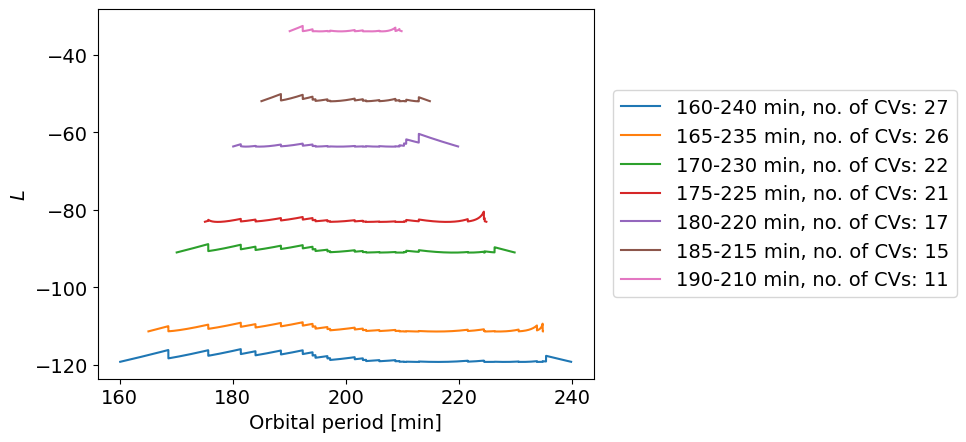

In [202]:
for i in range(0, 31, 5):
    per_min = 160 + i
    per_max = 240 - i
    x_rang = df_non_polars['per']
    x_rang = x_rang[x_rang.between(per_min, per_max)]
    period_boundaries = np.array([per_min, per_max])
    period_split = np.arange(per_min + .1, per_max -.1, .01)
    count = df_non_polars['per'][df_non_polars['per'].between(per_min, per_max)].count()
    plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=1.00001, boundaries=period_boundaries), label=f"{per_min}-{per_max} min, no. of CVs: {count}")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.xlabel('Orbital period [min]')
plt.ylabel('$L$')

In [203]:
df_non_polars['per'][df_non_polars['per'].between(150, 300)].count()

42